In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.cross_validation import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data1=pd.read_csv('01Fitriani.csv', sep=';', index_col=False)
data2=pd.read_csv('02Nita.csv', sep=';', index_col=False)
data3=pd.read_csv('03Adi.csv', sep=';', index_col=False)
data4=pd.read_csv('04Gitania.csv', sep=';', index_col=False)
data5=pd.read_csv('05Rossi.csv', sep=';', index_col=False)
data6=pd.read_csv('06Rindy.csv', sep=';', index_col=False)
data7=pd.read_csv('08Shafa.csv', sep=';', index_col=False)
data8=pd.read_csv('09Rakhmawati.csv', sep=';', index_col=False)
data9=pd.read_csv('10Resty.csv', sep=';', index_col=False)
data10=pd.read_csv('11Meita.csv', sep=';', index_col=False)
data11=pd.read_csv('12Richard.csv', sep=';', index_col=False)
data12=pd.read_csv('13Dimas.csv', sep=';', index_col=False)
data13=pd.read_csv('14Alfin.csv', sep=';', index_col=False)
data14=pd.read_csv('Cimul.csv', sep=',', index_col=False)
data15=pd.read_csv('Dairul.csv', sep=',', index_col=False)
fitur=['X1','X2','X4','X5','X6','Y1','Y2','Y3','Y4','Y5']
fitur1=['X1','X2','X4','X5','X6','Y5']
data15=data15[fitur1]
data16=pd.read_csv('Devi1.txt', sep=',', index_col=False)
data16=data16.drop(['nomor','Unnamed: 11','Unnamed: 12'], axis=1)
#data16.head()
data17=pd.read_csv('Yuniar.csv', sep=';', index_col=False)
data17=data17.drop(['No resp','Unnamed: 17','Unnamed: 18'],axis=1)



In [3]:
data=data6
#data=data3[data3['Fakultas']!='4x2']
data.head()
#data['Kelas'].value_counts()
#data['Y1']=pd.Categorical(data['Y1'])
#data.info()
#print(data.info())

,fakultas,mayor,Minor,ipk,jk,daerahasal,sekolah,jalurmasuk,beasiswa,respon
0,0x1,Manajemen Sumberdaya Lahan,0x2,2.72,1x4,0x5,swasta,1x7,0x8,0
1,0x1,Manajemen Sumberdaya Lahan,0x2,2.45,1x4,0x5,negeri,0x7,0x8,0
2,0x1,Manajemen Sumberdaya Lahan,0x2,2.63,0x4,1x5,negeri,1x7,0x8,0
3,0x1,Manajemen Sumberdaya Lahan,1x2,3.02,1x4,0x5,negeri,0x7,1x8,0
4,0x1,Manajemen Sumberdaya Lahan,0x2,2.39,0x4,1x5,negeri,2x7,1x8,0


In [4]:
y=data['respon']
X=data.drop(['respon'],1)
y.value_counts()

#X['X5'].value_counts()

#y = y.map(dict(TL=0, L=1))
#y.value_counts()
##Khusus data kak dairul
#y=pd.Categorical(data['Y2'])
#X=data.drop(['Y1','Y2','Y3','Y4','Y5','Z'],1)
#y.value_counts()
#y = y.map(dict(yes=0, no=1))


0    4851
1    2173
Name: respon, dtype: int64

In [34]:
X['JUMLAH KREDIT']=np.sqrt(X['JUMLAH KREDIT'])

In [5]:
X=pd.get_dummies(X, drop_first='True')
X.head()
#X.info()

,ipk,fakultas_1x1,fakultas_2x1,fakultas_3x1,fakultas_4x1,fakultas_5x1,fakultas_6x1,fakultas_7x1,fakultas_8x1,mayor_1x1,...,mayor_Teknologi Produksi Ternak,mayor_Teknologi dan Manajemen Perikanan Budidaya,mayor_Teknologi dan Manajemen Perikanan Tangkap,Minor_1x2,jk_1x4,daerahasal_1x5,sekolah_swasta,jalurmasuk_1x7,jalurmasuk_2x7,beasiswa_1x8
0,2.72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,2.45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.63,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,3.02,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,2.39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [272]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE  
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, y)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X_resampled ,y_resampled,test_size=0.3, random_state=7, stratify = y_resampled)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X ,
                                                y,
                                                test_size=0.3, 
#                                                random_state=7,
                                                stratify=y)

In [7]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100,  
                            penalty='l2')
    nn = MLPClassifier((80, 10), early_stopping=False) 
                      
    gb = GradientBoostingClassifier(n_estimators=100)
    rf = RandomForestClassifier(n_estimators=10, max_features=3)
    bag = BaggingClassifier()
    dt = DecisionTreeClassifier()
    lda = LinearDiscriminantAnalysis()   
    models = {
#              'lda': lda,
#              'svm': svc,
              'knn': knn,
#              'naive bayes': nb,
#              'mlp-nn': nn,
              'random forest': rf,
#              'gbm': gb,
              'logistic': lr,
             'bagging' : bag,
              'decision tree' : dt,
              }

    return models


def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((y_test.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(X_train, y_train)
        P.iloc[:, i] = m.predict_proba(X_test)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P


def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [8]:
from sklearn.metrics import roc_auc_score
#SEED=7
models = get_models()
P = train_predict(models)
score_models(P, y_test)

Fitting models.
knn... done
random forest... done
logistic... done
bagging... done
decision tree... done
Done.

Scoring models.
knn                       : 0.695
random forest             : 0.708
logistic                  : 0.788
bagging                   : 0.717
decision tree             : 0.628
Done.



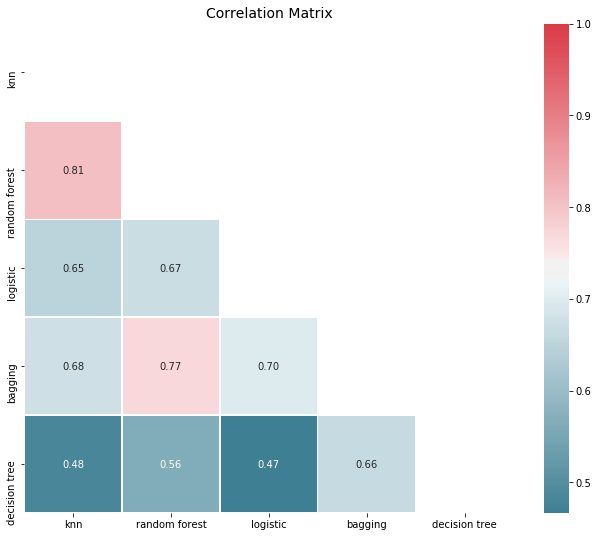

In [10]:
# You need ML-Ensemble for this figure: you can install it with: pip install mlens
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)
plt.show()

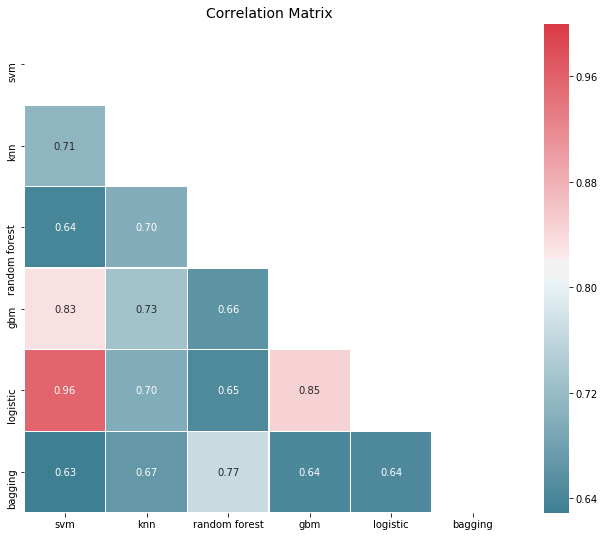

In [28]:
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - y_test.values).corr(), inflate=False)
plt.show()

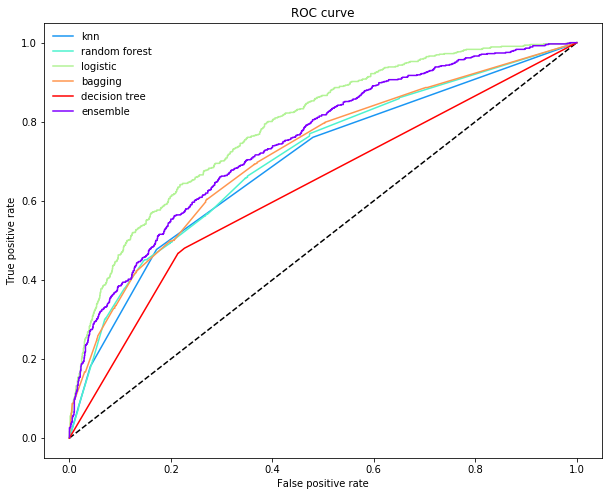

In [11]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]
    
    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(y_test, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(y_test, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()


plot_roc_curve(y_test, P.values, P.mean(axis=1), list(P.columns), "ensemble")

In [1]:
#p = P.apply(lambda x: 1*(x >= 0.5).value_counts(normalize=True))
#p.index = ["0", "1"]
#p.loc["1", :].sort_values().plot(kind="bar")
#plt.axhline(0.25, color="k", linewidth=0.5)
#plt.text(0., 0.23, "y")
#plt.show()

In [2]:
#meta_learner = GradientBoostingClassifier(
#    n_estimators=1000,
#    loss="exponential",
#    max_features=4,
#    max_depth=3,
#    subsample=0.5,
#    learning_rate=0.005
#)

In [12]:
base_learners = get_models()
meta_learner =  LogisticRegression( penalty='l2')
meta_learner =  LogisticRegression()



Fitting 2 layers
Processing layer-1             done | 00:00:18
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:19

Predicting 2 layers
Processing layer-1             done | 00:00:13
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:14

Super Learner ROC-AUC score: 0.790


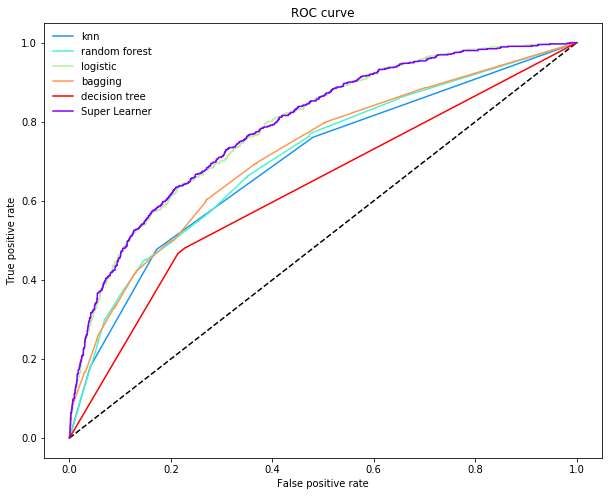

Confusion Matrix : 
 [[1325  131]
 [ 371  281]]

             precision    recall  f1-score   support

          0       0.78      0.91      0.84      1456
          1       0.68      0.43      0.53       652

avg / total       0.75      0.76      0.74      2108


Accuracy :  0.7618595825426945
Sensitivity :  0.9100274725274725
Specificity :  0.43098159509202455


In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
from mlens.ensemble import SuperLearner
# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
#    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train, y_train)

# Predict the test set
p_sl = sl.predict_proba(X_test)

print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test, p_sl[:, 1]))
plot_roc_curve(y_test, P.values, pd.DataFrame(p_sl)[1], list(P.columns), "Super Learner")

y_pred = p_sl
y_pred[:,1][y_pred[:,1]>0.5]=1
y_pred[:,1][y_pred[:,1]<0.5]=0

cm=confusion_matrix(y_test, y_pred[:,1])
print('Confusion Matrix : \n', cm)
print()
print(classification_report(y_test,y_pred[:,1]))
print()
total=sum(sum(cm))

#####from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)


In [17]:
sl.get_params

<bound method BaseEstimator.get_params of SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=None, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...rer=None)],
   n_jobs=-1, name='group-7', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=None, sample_size=20, scorer=None, shuffle=False,
       verbose=2)>

In [107]:
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=4,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.005
)

In [22]:
base_learners = get_models()
#meta_learner =  LogisticRegression(C=100, penalty='l2')
meta_learner =  LogisticRegression()


In [23]:
import time


Time=[]
Accuracy = []
Sensitivity = []
Specificity=[]

for i in range (20):
    start = time. time()
    sl.fit(X_train, y_train)
    end = time. time()
    times=end-start
    # Predict the test set
    p_sl = sl.predict_proba(X_test)
    y_pred = p_sl
    y_pred[:,1][y_pred[:,1]>0.5]=1
    y_pred[:,1][y_pred[:,1]<0.5]=0
    cm=confusion_matrix(y_test, y_pred[:,1])
    total=sum(sum(cm))
    #####from confusion matrix calculate accuracy
    accuracy=(cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    Accuracy.append(accuracy)
    Sensitivity.append(sensitivity)   
    Specificity.append(specificity)
    Time.append(times)
    


Fitting 2 layers
Processing layer-1             done | 00:00:19
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:19

Predicting 2 layers
Processing layer-1             done | 00:00:12
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:13

Fitting 2 layers
Processing layer-1             done | 00:00:18
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:19

Predicting 2 layers
Processing layer-1             done | 00:00:14
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:15

Fitting 2 layers
Processing layer-1             done | 00:00:18
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:19

Predicting 2 layers
Processing layer-1             done | 00:00:13
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:14

Fitting 2 layers
Processing layer-1 

In [24]:
tabel=pd.DataFrame()
tabel['Accuracy']=Accuracy
tabel['Sensitivity']=Sensitivity
tabel['Specificity']=Specificity
tabel['Time']=Time
print(tabel.mean())
tabel

Accuracy        0.763591
Sensitivity     0.913015
Specificity     0.429908
Time           19.328342
dtype: float64


,Accuracy,Sensitivity,Specificity,Time
0,0.765180,0.912088,0.437117,19.913159
1,0.764231,0.912088,0.434049,19.435607
2,0.762808,0.911401,0.430982,19.119713
3,0.764706,0.914148,0.430982,20.051567
4,0.764706,0.914148,0.430982,19.220702
5,0.763757,0.913462,0.429448,18.790070
6,0.763757,0.913462,0.429448,18.934099
7,0.762808,0.913462,0.426380,19.617587
8,0.762808,0.912088,0.429448,19.102414
9,0.762808,0.912088,0.429448,19.187710


In [157]:
knn = KNeighborsClassifier(n_neighbors=7)
dt=DecisionTreeClassifier()
lr=LogisticRegression(penalty='l2')
clf=knn.fit(X_train,y_train)
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm)
print()
print(classification_report(y_test,y_pred))
print()
total=sum(sum(cm))

#####from confusion matrix calculate accuracy
accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Confusion Matrix : 
 [[   5  158]
 [  14 1309]]

             precision    recall  f1-score   support

          0       0.26      0.03      0.05       163
          1       0.89      0.99      0.94      1323

avg / total       0.82      0.88      0.84      1486


Accuracy :  0.8842530282637954
Sensitivity :  0.03067484662576687
Specificity :  0.9894179894179894
